In [1]:
import kagglehub
import shutil

dataset_path = "/content/animal_dataset"

print("Downloading dataset...")
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# Move dataset to /content/ to ensure it’s accessible
shutil.move(path, dataset_path)

print("Dataset saved at:", dataset_path)


In [2]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [4]:
dataset_path = "/content/animal_dataset/animals/animals"

classes = os.listdir(dataset_path)
num_classes = len(classes)

print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')


Number of Classes: 90
Classes: ['lion', 'snake', 'wolf', 'raccoon', 'tiger', 'turkey', 'pig', 'squid', 'moth', 'hare', 'lobster', 'okapi', 'grasshopper', 'cat', 'hamster', 'horse', 'swan', 'antelope', 'gorilla', 'bear', 'pigeon', 'goose', 'woodpecker', 'bison', 'ox', 'otter', 'sheep', 'kangaroo', 'seal', 'jellyfish', 'orangutan', 'beetle', 'squirrel', 'flamingo', 'wombat', 'chimpanzee', 'goat', 'rat', 'bee', 'dragonfly', 'seahorse', 'hippopotamus', 'hyena', 'sandpiper', 'sparrow', 'fox', 'badger', 'bat', 'penguin', 'starfish', 'whale', 'elephant', 'boar', 'donkey', 'hummingbird', 'hedgehog', 'owl', 'mouse', 'goldfish', 'leopard', 'dolphin', 'fly', 'dog', 'pelecaniformes', 'mosquito', 'octopus', 'porcupine', 'reindeer', 'hornbill', 'rhinoceros', 'deer', 'parrot', 'koala', 'crab', 'butterfly', 'turtle', 'coyote', 'caterpillar', 'duck', 'ladybugs', 'panda', 'cockroach', 'zebra', 'oyster', 'possum', 'shark', 'eagle', 'crow', 'lizard', 'cow']


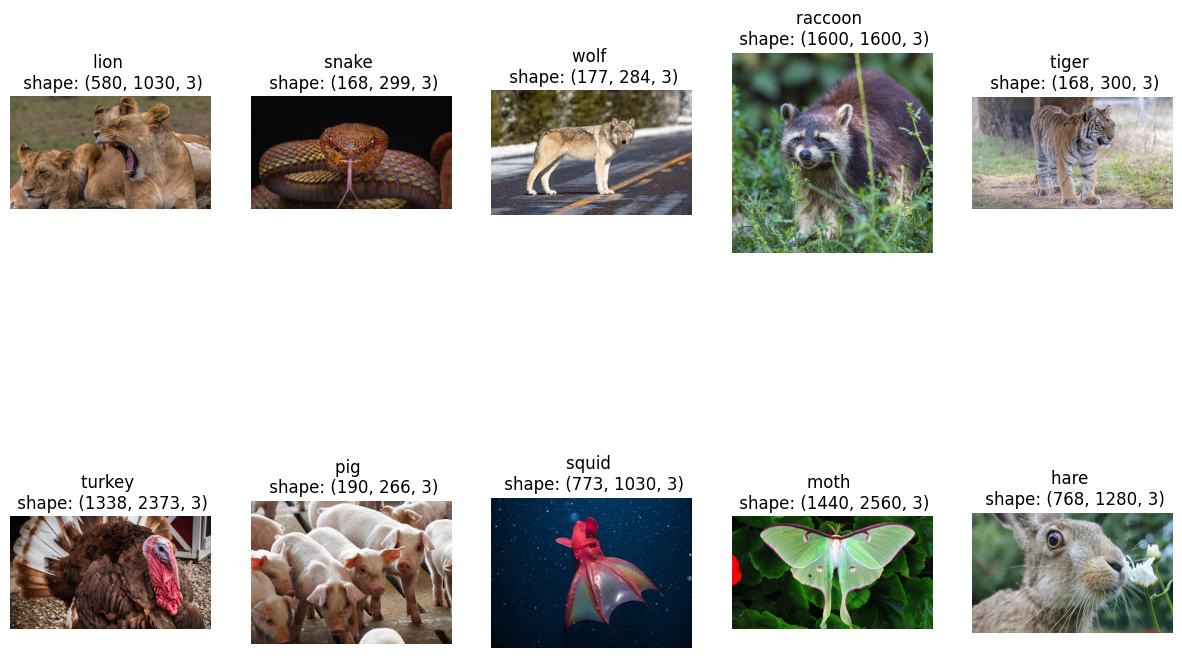

In [5]:
plt.figure(figsize=(15,10))
for i, class_name in enumerate(classes[:10]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(2, 5, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

In [7]:
img_size = (224, 224)
batch_size = 64

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [8]:
class_indices = train_generator.class_indices
print(class_indices)

class_names = list(class_indices.keys())
print("Class Names:", class_names)

{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69, 'rhinoceros': 

In [10]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,661,978 (13.97 MB)

 Trainable params: 1,403,994 (5.36 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs = 20
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 67s 704ms/step - accuracy: 0.0431 - loss: 4.5471 - val_accuracy: 0.5137 - val_loss: 3.2768
Epoch 2/20
 1/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.1875 - loss: 3.5786

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.1875 - loss: 3.5786 - val_accuracy: 0.5020 - val_loss: 3.2824
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 555ms/step - accuracy: 0.3960 - loss: 3.0450 - val_accuracy: 0.7383 - val_loss: 1.9015
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.7344 - loss: 1.6737 - val_accuracy: 0.7422 - val_loss: 1.8895
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 603ms/step - accuracy: 0.6447 - loss: 1.7927 - val_accuracy: 0.7773 - val_loss: 1.2409
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.6719 - loss: 1.4357 - val_accuracy: 0.7695 - val_loss: 1.2213
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 530ms/step - accuracy: 0.7318 - loss: 1.2151 - val_accuracy: 0.8145 - val_loss: 0.9494
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.8594 - loss: 0.7860 - val_accuracy: 0.8223 - val_loss: 0.9280
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 599ms/step - accuracy: 0.7789 - loss: 0.9335 - val_accuracy: 0.8242 - val_

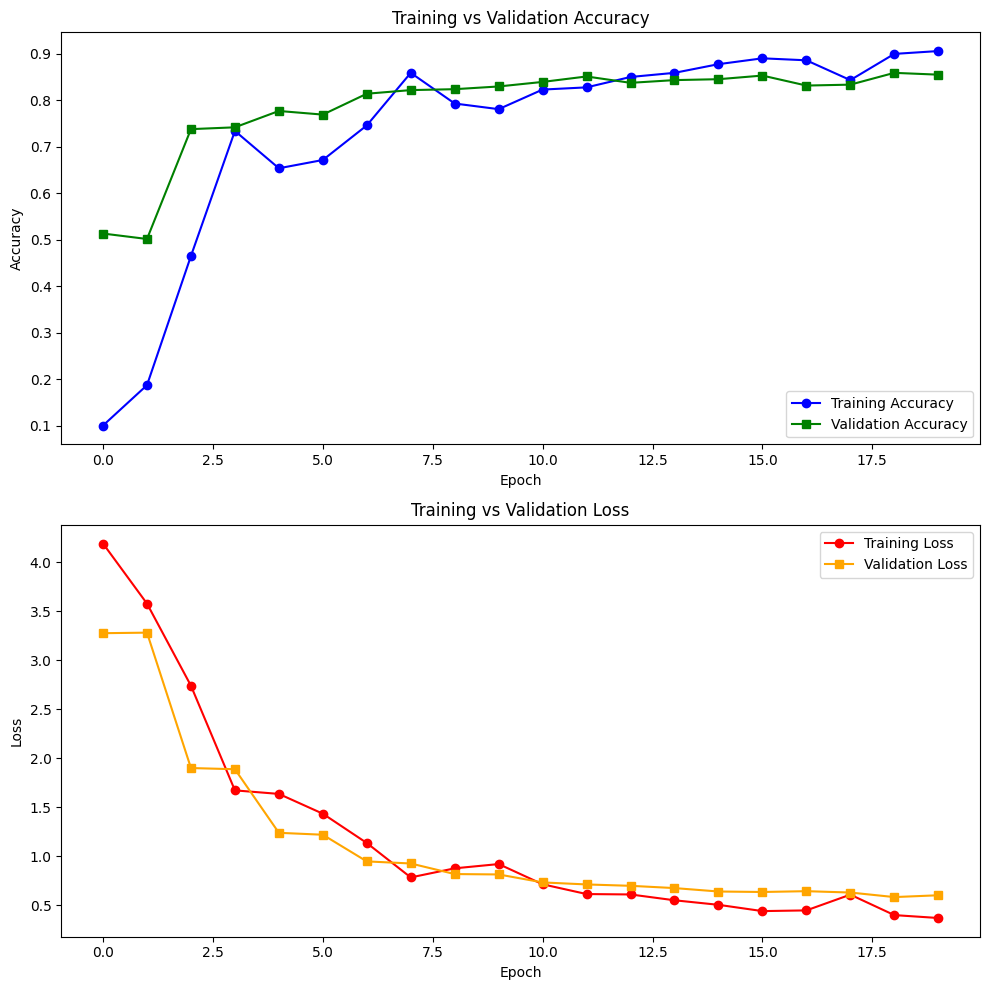

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(history.history['accuracy'], marker='o', label='Training Accuracy', color='blue')
ax[0].plot(history.history['val_accuracy'], marker='s', label='Validation Accuracy', color='green')
ax[0].set_title('Training vs Validation Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

ax[1].plot(history.history['loss'], marker='o', label='Training Loss', color='red')
ax[1].plot(history.history['val_loss'], marker='s', label='Validation Loss', color='orange')
ax[1].set_title('Training vs Validation Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [18]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 0.8412 - loss: 0.6321
Validation Loss: 0.5979846119880676
Validation Accuracy: 0.855555534362793


In [19]:
# Save the model
model.save('MCAR.keras')


In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('MCAR.keras')

def predict_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [25]:

os.listdir('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/dog')


['41f5881bb6.jpg',
 '6afa462776.jpg',
 '26c7056eda.jpg',
 '4db9316411.jpg',
 '6be2081479.jpg',
 '0ff0ba075e.jpg',
 '2afd300e67.jpg',
 '9ac386dfb6.jpg',
 '76bad2abea.jpg',
 '05b151f72d.jpg',
 '89af0e8454.jpg',
 '7f45bd0030.jpg',
 '0b6670809d.jpg',
 '7bee213463.jpg',
 '01c6b7230c.jpg',
 '62ebcbaf99.jpg',
 '1c768b0135.jpg',
 '58b4804b9e.jpg',
 '0a73823599.jpg',
 '5c641a8bde.jpg',
 '7a42ed2c8d.jpg',
 '8deb324d92.jpg',
 '9aeb8c737b.jpg',
 '17f6784a37.jpg',
 '23c5c07d8d.jpg',
 '0d33157df8.jpg',
 '4ddebbca9a.jpg',
 '3fb7d7c4ef.jpg',
 '5d961159a7.jpg',
 '4aacd195b5.jpg',
 '6a5c5cce2c.jpg',
 '87bfbc889f.jpg',
 '82a669ccf6.jpg',
 '44a1bbc202.jpg',
 '7a47b70b45.jpg',
 '86ca756626.jpg',
 '22f99b4396.jpg',
 '084a6888d7.jpg',
 '2f0043ea55.jpg',
 '9bd48a19a4.jpg',
 '024a037366.jpg',
 '1d97824ca1.jpg',
 '8edafffd38.jpg',
 '2a74dd288c.jpg',
 '0df912089d.jpg',
 '3f956b8d4c.jpg',
 '7c43d5ca9e.jpg',
 '36c2df0788.jpg',
 '4fdbeb98ad.jpg',
 '4df813f7f1.jpg',
 '63b74efb32.jpg',
 '8c6a936c9a.jpg',
 '0be3797d3d

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


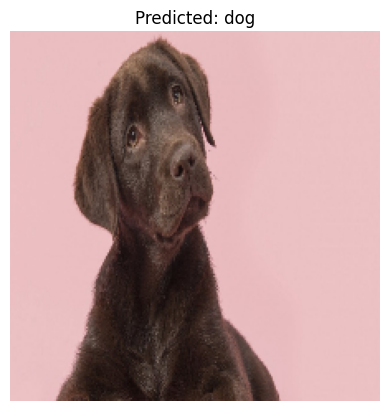

In [32]:
predict_animal('/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/dog/7ca88b95e5.jpg')
